In [1]:
#Import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from datetime import date

## Data cleaning and exploration

In [2]:
#load dataset
data= pd.read_csv('train.csv')

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# checking the shape of the data
data.shape

(1460, 81)

In [5]:
#checking for duplicated columns
data.duplicated().any()

False

In [6]:
#missing data
missing= data.isnull().sum()
missing= missing[missing>0]
missing.sort_values(ascending= False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

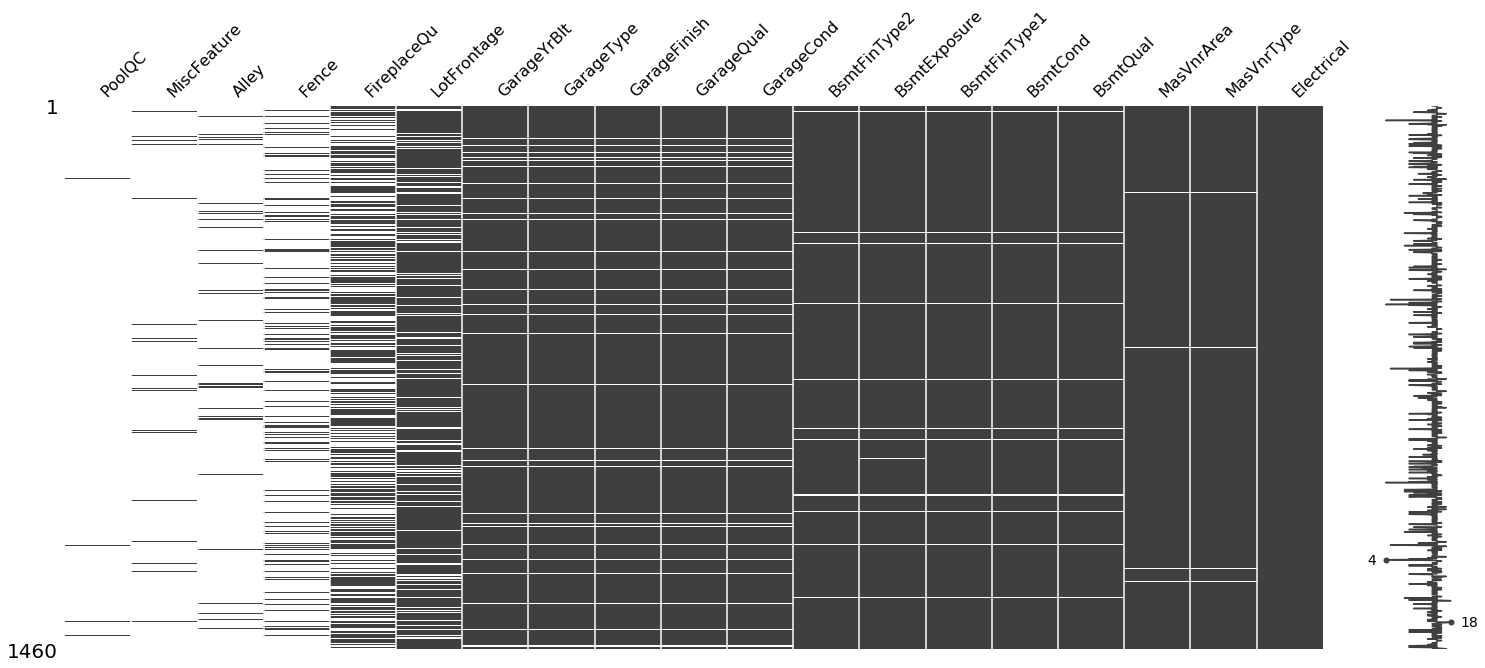

In [7]:
# visualization of missing data using missingno
msno.matrix(data[['PoolQC','MiscFeature', 'Alley','Fence','FireplaceQu','LotFrontage','GarageYrBlt','GarageType','GarageFinish','GarageQual','GarageCond','BsmtFinType2','BsmtExposure','BsmtFinType1','BsmtCond','BsmtQual','MasVnrArea','MasVnrType','Electrical']])

In [ ]:
# filling the missing values
columns = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageCond', 'GarageQual', 'GarageFinish', 'GarageType','BsmtFinType2', 'BsmtExposure', 'BsmtFinType1',
            'BsmtCond', 'BsmtQual']

def fill_missing(df, column_name):
    df[column_name] = df[column_name].fillna('No_' + column_name)

for col in columns:
    fill_missing(data, col)

: 

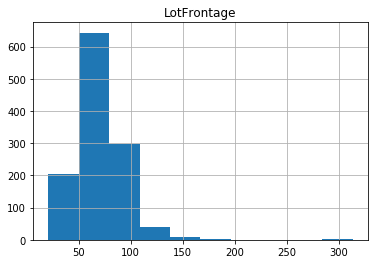

In [9]:
# visualizing lot frontage
data.hist('LotFrontage')
plt.show()

## Feature engineering

In [10]:
#filling missing data using mean
data['LotFrontage'].fillna(data['LotFrontage'].mean(), inplace = True)

In [11]:
# dropping missing data
data.dropna(subset=[ 'MasVnrArea', 'Electrical', 'MasVnrType'], inplace=True)

In [12]:
# data information 
data.info(verbose= True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1451 non-null   int64  
 1   MSSubClass     1451 non-null   int64  
 2   MSZoning       1451 non-null   object 
 3   LotFrontage    1451 non-null   float64
 4   LotArea        1451 non-null   int64  
 5   Street         1451 non-null   object 
 6   Alley          1451 non-null   object 
 7   LotShape       1451 non-null   object 
 8   LandContour    1451 non-null   object 
 9   Utilities      1451 non-null   object 
 10  LotConfig      1451 non-null   object 
 11  LandSlope      1451 non-null   object 
 12  Neighborhood   1451 non-null   object 
 13  Condition1     1451 non-null   object 
 14  Condition2     1451 non-null   object 
 15  BldgType       1451 non-null   object 
 16  HouseStyle     1451 non-null   object 
 17  OverallQual    1451 non-null   int64  
 18  OverallC

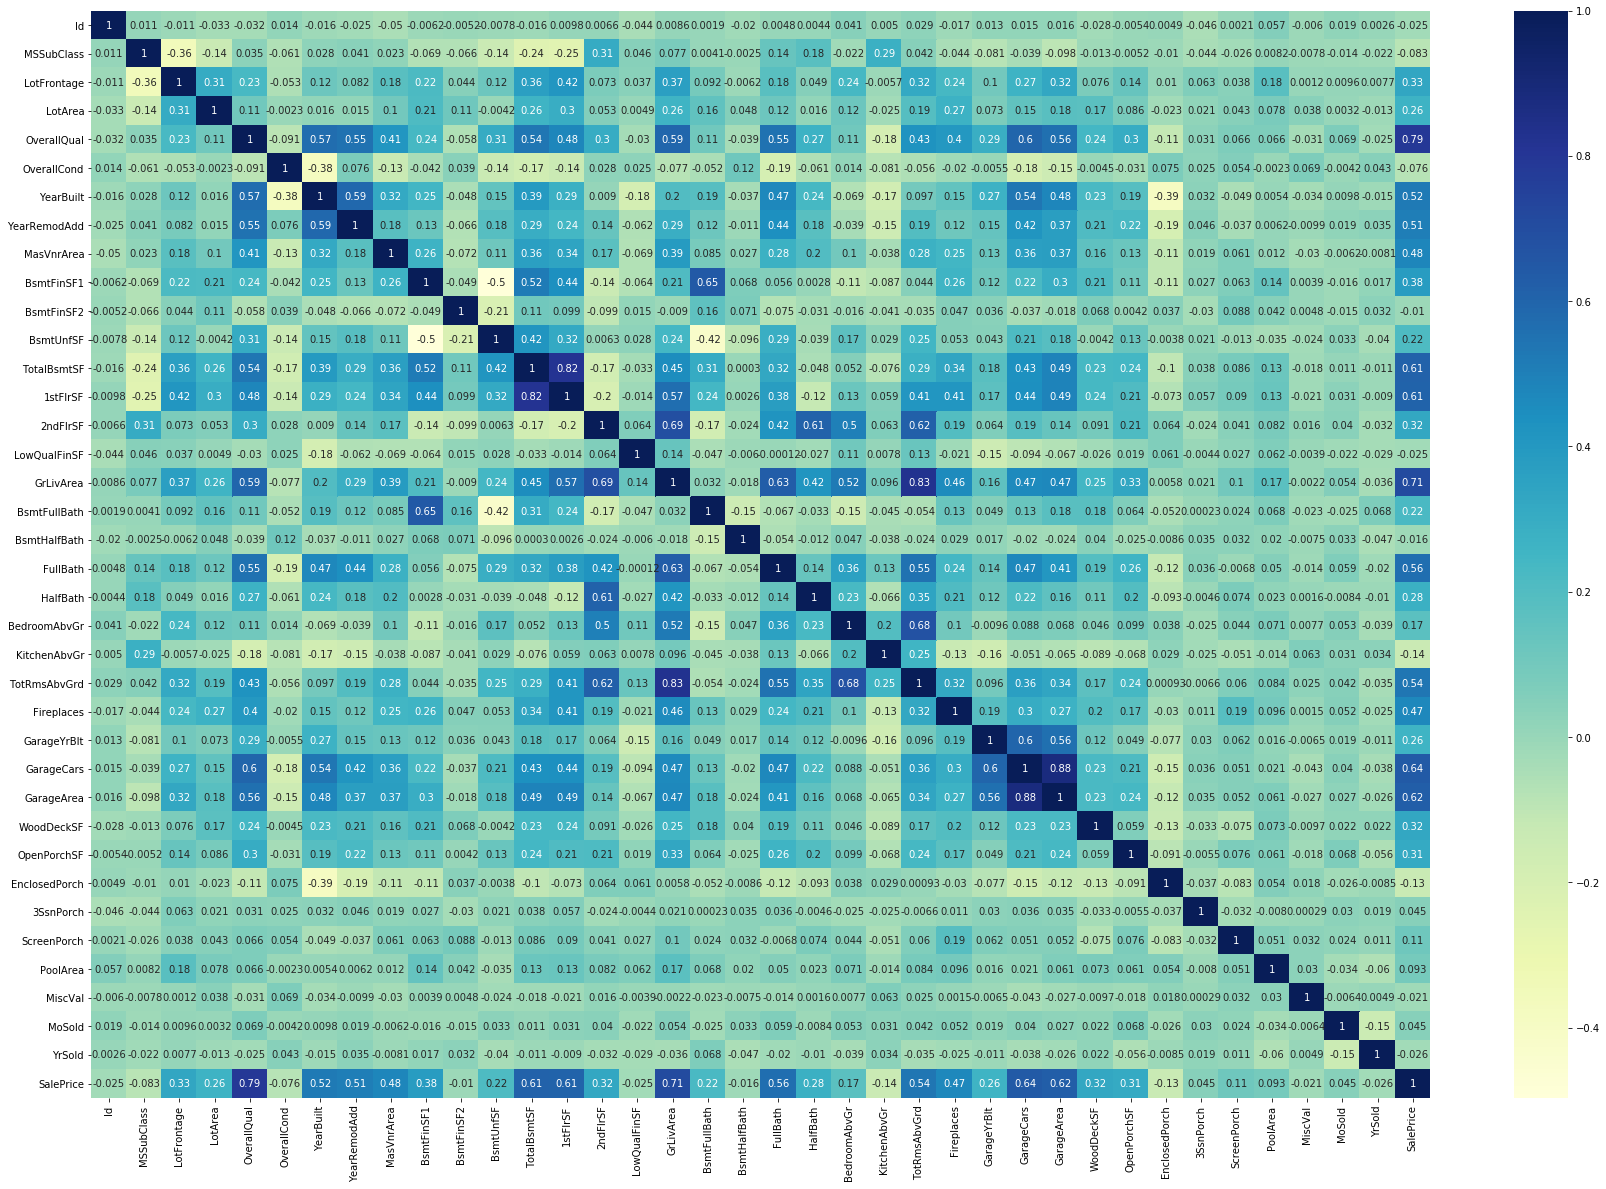

In [13]:
# Plotting an heatmap to show correlations
plt.figure(figsize=(30, 20))
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)

In [14]:
# joining the month and year sold column
data['DateSold'] =pd.to_datetime(data.YrSold.astype(str) + '/' + data.MoSold.astype(str) + '/01')

In [15]:
# converting datetime to date
data['DateSold'] = pd.to_numeric(pd.to_datetime(data['DateSold']))

In [16]:
#dropping columns
data = data.drop(['Id','MoSold','YrSold'], 1)

In [17]:
# turning categorical data into dummies
data= pd.get_dummies(data)

In [18]:
data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0


In [19]:
# seperating dataset into features and target
X= data.drop(labels=['SalePrice'],axis=1).values
y = data['SalePrice'].values

In [20]:
# spliting dataset into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state=19)

In [21]:
# sacling dataset
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

# for random forest you don't need scaling